In [14]:
def print_table(op):
    ops = {
        '+': lambda x, y: x + y,
        '-': lambda x, y: x - y,
        '*': lambda x, y: x * y,
        '/': lambda x, y: x / y,
    }

    if ops.get(op) is None:
        print('Unknown op')
        return

    func = ops[op]
    pattern = '7.3f' if op == '/' else '7'

    print(f' {op} |', end='')
    for i in range(1, 10):
        print(f'{i:7}', end='')
    print('\n', '-' * 68, sep='')

    for i in range(1, 10):
        print(f'{i:^3}|', end='')
        for j in range(1, 10):
            print(f'{func(i, j):{pattern}}', end='')
        print()


op = input('Choose op for table (+-*/): ')
print_table(op)

 / |      1      2      3      4      5      6      7      8      9
--------------------------------------------------------------------
 1 |  1.000  0.500  0.333  0.250  0.200  0.167  0.143  0.125  0.111
 2 |  2.000  1.000  0.667  0.500  0.400  0.333  0.286  0.250  0.222
 3 |  3.000  1.500  1.000  0.750  0.600  0.500  0.429  0.375  0.333
 4 |  4.000  2.000  1.333  1.000  0.800  0.667  0.571  0.500  0.444
 5 |  5.000  2.500  1.667  1.250  1.000  0.833  0.714  0.625  0.556
 6 |  6.000  3.000  2.000  1.500  1.200  1.000  0.857  0.750  0.667
 7 |  7.000  3.500  2.333  1.750  1.400  1.167  1.000  0.875  0.778
 8 |  8.000  4.000  2.667  2.000  1.600  1.333  1.143  1.000  0.889
 9 |  9.000  4.500  3.000  2.250  1.800  1.500  1.286  1.125  1.000


In [15]:
import random


def create_vector(n: int) -> list[float]:
    return [random.uniform(0, 1) for _ in range(n)]


def create_matrix(n: int, m: int) -> list[list[float]]:
    return [[random.uniform(0, 1) for _ in range(m)] for _ in range(n)]


def multiply_matrix_vector(
        A: list[list[float]], x: list[float]
) -> list[float]:

    b = [0.0] * len(A)
    for i, row in enumerate(A):
        for j, elem in enumerate(row):
            b[i] += x[j] * elem
    return b


def print_matrix(A: list[list[float]], format='8.3f') -> None:
    for row in A:
        print('|', end='')
        for elem in row:
            print(f'{elem:{format}}', end='')
        print('|')
    print()


def print_vector(x: list[float], format='8.3f') -> None:
    for elem in x:
        print(f'|{elem:{format}}|')
    print()


def pseudo_trace(A: list[list[float]]) -> float:
    min_size = len(A)
    if min_size > 0:
        min_size = min(min_size, len(A[0]))

    trace = 0
    for i in range(min_size):
        trace += A[i][i]
    return trace


A = create_matrix(5, 8)
x = create_vector(8)
b = multiply_matrix_vector(A, x)
p_trace = pseudo_trace(A)

print('Matrix:')
print_matrix(A)

print('Vector:')
print_vector(x)

print(f'Sum of diagonal elements: {p_trace:8.3f}')
print()

'''------------------------------------------------------------------------------'''


def create_int_matrix(n: int, m: int, min_val, max_val) -> list[list[int]]:
    return [[random.randint(min_val, max_val)
             for _ in range(m)] for _ in range(n)]


def convolve(data: list[list[int]],
             kernel: list[list[int]]) -> list[list[int]]:
    assert 0 < len(kernel) <= len(data)
    assert 0 < len(kernel[0]) <= len(data[0])

    n = len(data) - len(kernel) + 1
    m = len(data[0]) - len(kernel[0]) + 1
    res = [[0] * m for _ in range(n)]

    for i in range(n):
        for j in range(m):
            convolution = 0
            for k, kernel_row in enumerate(kernel):
                for l, _ in enumerate(kernel_row):
                    convolution += data[i + k][j + l] * kernel[k][l]
            res[i][j] = convolution

    return res


img = create_int_matrix(5, 6, 0, 255)
kernel = create_int_matrix(2, 3, -1, 1)

print('Image:')
print_matrix(img, '5')

print('Kernel:')
print_matrix(kernel, '5')

print('Convolution:')
print_matrix(convolve(img, kernel), '5')

Matrix:
|   0.815   0.328   0.296   0.642   0.303   0.146   0.256   0.207|
|   0.186   0.463   0.122   0.436   0.049   0.340   0.228   0.575|
|   0.804   0.775   0.602   0.437   0.867   0.682   0.167   0.267|
|   0.859   0.305   0.964   0.695   0.934   0.131   0.752   0.790|
|   0.747   0.279   0.274   0.450   0.179   0.132   0.863   0.606|

Vector:
|   0.780|
|   0.635|
|   0.786|
|   0.499|
|   0.409|
|   0.747|
|   0.931|
|   0.615|

Sum of diagonal elements:    2.754

Image:
|   16  183  105   64  135   18|
|   59  230  206   68   38  145|
|  126  121  234  241  132   31|
|  250  193  116  231   80    8|
|  164  174  210  102  132   93|

Kernel:
|   -1    0   -1|
|    0   -1   -1|

Convolution:
| -557 -521 -346 -265|
| -620 -773 -617 -376|
| -669 -709 -677 -360|
| -750 -736 -430 -464|



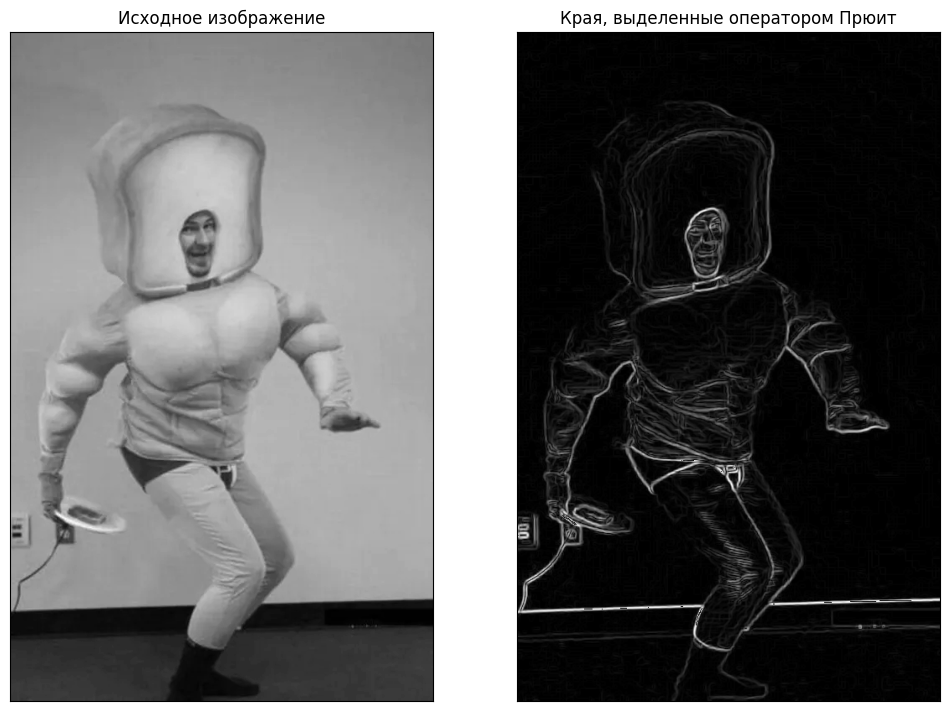

Свёртка работает


In [16]:
# Можем убедиться, что наша свёртка работает на реальных данных

import cv2
import matplotlib.pyplot as plt
import numpy as np


def show_gray_img(img: list[list[int]], title, ax) -> None:
    ax.imshow(np.array(img, np.uint8), cmap=plt.cm.gray, aspect='equal')
    ax.set_title(title)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)


img = cv2.imread('image.png', 0).tolist()
kernels = [
    [
        [-1, -1, -1],
        [ 0,  0,  0],
        [ 1,  1,  1],
    ],
    [
        [-1, 0, 1],
        [-1, 0, 1],
        [-1, 0, 1],
    ],
]


convolved = np.round(
    np.sqrt(
        np.array(
            convolve(
                img,
                kernels[0])) ** 2 +
        np.array(
            convolve(
                img,
                kernels[1])) ** 2)).tolist()


fig, ax = plt.subplots(1, 2, figsize=(12, 10))
show_gray_img(img, 'Исходное изображение', ax[0])
show_gray_img(convolved, 'Края, выделенные оператором Прюит', ax[1])
plt.show()

print('Свёртка работает')

In [17]:
def three_dim(func):
    def wrapper(image, kernel):
        return [func(channel, kernel) for channel in image]
    return wrapper


@three_dim
def same_as_convolve(data, kernel):
    return convolve(data, kernel)


img = [create_int_matrix(5, 6, 0, 255) for _ in range(3)]
kernel = create_int_matrix(2, 3, -1, 1)
convolved3 = same_as_convolve(img, kernel)

print('Image:')
for channel in img:
    print_matrix(channel, '5')

print('Kernel:')
print_matrix(kernel, '5')

print('Convolved:')
for convolved in convolved3:
    print_matrix(convolved, '5')

Image:
|  217  216   62   99  128   33|
|    9  103   48  117   91  183|
|  124  137  105   12   71  222|
|  209    3  157  117   22  192|
|  110  130   18  171  212  123|

|   17  159   37  172   77   70|
|  156  247  247  119  175  138|
|  182  185  237   85  167   83|
|  233   97  131  104  147  125|
|  120   64  114  119   91  190|

|  255  139  204   80  222   89|
|  157   60  109  196   85  229|
|  243  221  105  112  162   16|
|  144  174  116   15    6  244|
|  146   26   23   89  190   59|

Kernel:
|    0   -1    1|
|    1    1    0|

Convolved:
|  -42  188  194  113|
|  206  311   91  175|
|  180   67  333  290|
|  394  108   94  553|

|  281  629  271  287|
|  367  294  378  215|
|  382   76  317  167|
|  218  151  276  188|

|  282   45  447  148|
|  513  413  106  418|
|  202  297  181 -125|
|  114  -52  103  517|



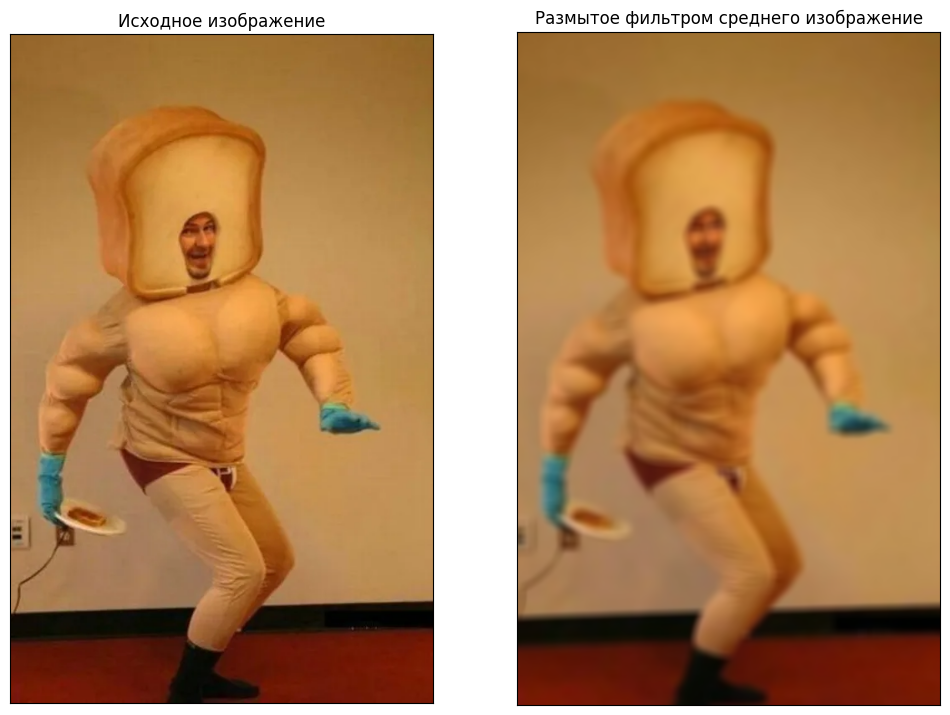

Свёртка работает


In [18]:
# Теперь проверим свёртку на цветном изображении

import cv2
import matplotlib.pyplot as plt
import numpy as np


def show_img(img: list[list[int]], title, ax) -> None:
    ax.imshow(np.moveaxis(np.array(img, np.uint8), 0, 2), aspect='equal')
    ax.set_title(title)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)


img = cv2.imread('image.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = np.moveaxis(img, 2, 0).tolist()

n = 11
kernel = [[1 / n ** 2] * n] * n

convolved = same_as_convolve(img, kernel)

fig, ax = plt.subplots(1, 2, figsize=(12, 10))
show_img(img, 'Исходное изображение', ax[0])
show_img(convolved, 'Размытое фильтром среднего изображение', ax[1])
plt.show()

print('Свёртка работает')

In [19]:
def rgb_to_yiq(rgb: list[float]) -> list[float]:
    transformation_matrix = [
        [0.2990,  0.5870,  0.1140],
        [0.5959, -0.2746, -0.3213],
        [0.2115, -0.5227,  0.3112]
    ]
    return multiply_matrix_vector(transformation_matrix, rgb)


def yiq_to_rgb(yiq: list[float]) -> list[float]:
    transformation_matrix = [
        [1,  0.956,  0.619],
        [1, -0.272, -0.647],
        [1, -1.106,  1.703]
    ]
    return multiply_matrix_vector(transformation_matrix, yiq)


def convert_color(rgbt: list[float]) -> list[float]:
    color_type = rgbt[3]
    assert color_type in (0, 1)

    if color_type == 0:
        return rgb_to_yiq(rgbt[:3])
    else:
        return yiq_to_rgb(rgbt[:3])


rgb_color = create_vector(3)
yiq_color = convert_color(rgb_color + [0])

print('RGB color:')
print_vector(rgb_color)

print('RGB->YIQ:')
print_vector(yiq_color)

print('RGB->YIQ->RGB:')
print_vector(convert_color(yiq_color + [1]))

RGB color:
|   0.604|
|   0.667|
|   0.276|

RGB->YIQ:
|   0.603|
|   0.088|
|  -0.135|

RGB->YIQ->RGB:
|   0.604|
|   0.667|
|   0.276|

